In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Final_Data.csv')
df

,CCA_date_id,Date,CCA_name,CCA,number_of_trips,avg_tip,avg_distance,avg_trip_pooled,TOT_POP,MEDINC,...,crime_rate,AVg_Temp,Tol_precip,Avg_WS,COMMperc,INSTperc,sports_day,rainy_day,weekdays,MD_AGE_POP_PCT
0,427,1/1/2019,Rogers Park,1,3698,0.528935,5.667036,1.339643,55062,39106.18280,...,904.099016,30.08,0.00,7.93,0.051668,0.068270,0,0,1,0.5390
1,428,1/2/2019,Rogers Park,1,2467,0.513174,5.804499,1.352250,55062,39106.18280,...,904.099016,29.85,0.00,9.49,0.051668,0.068270,0,0,2,0.5390
2,429,1/3/2019,Rogers Park,1,2565,0.474854,5.861442,1.384405,55062,39106.18280,...,904.099016,32.32,0.00,11.29,0.051668,0.068270,0,0,3,0.5390
3,430,1/4/2019,Rogers Park,1,2941,0.481469,5.809725,1.374362,55062,39106.18280,...,904.099016,38.68,0.00,8.11,0.051668,0.068270,0,0,4,0.5390
4,431,1/5/2019,Rogers Park,1,3195,0.498592,5.763944,1.348670,55062,39106.18280,...,904.099016,41.25,0.00,8.00,0.051668,0.068270,0,0,5,0.5390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32797,33224,12/29/2019,Edgewater,77,3647,0.656156,5.675103,1.122566,55965,49287.01181,...,570.687036,54.76,1.09,11.52,0.069528,0.055595,0,1,6,0.5133
32798,33225,12/30/2018,Edgewater,77,4344,0.619475,5.067219,1.292818,55965,49287.01181,...,570.687036,28.55,0.00,11.66,0.069528,0.055595,0,0,6,0.5133
32799,33226,12/30/2019,Edgewater,77,3694,0.682187,5.835896,1.136437,55965,49287.01181,...,570.687036,34.27,0.14,18.81,0.069528,0.055595,0,1,0,0.5133
32800,33227,12/31/2018,Edgewater,77,2117,1.089277,4.687199,1.159188,55965,49287.01181,...,570.687036,37.85,1.03,11.07,0.069528,0.055595,0,1,0,0.5133


In [3]:
df1=df.drop(['CCA_date_id', 'Date', 'CCA_name', 'CCA','number_of_trips', 'avg_tip',
       'avg_trip_pooled','avg_distance'], axis = 1)
df1.head(20)

,TOT_POP,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,COMMperc,INSTperc,sports_day,rainy_day,weekdays,MD_AGE_POP_PCT
0,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.00,7.93,0.051668,0.06827,0,0,1,0.539
1,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.00,9.49,0.051668,0.06827,0,0,2,0.539
2,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.00,11.29,0.051668,0.06827,0,0,3,0.539
3,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.00,8.11,0.051668,0.06827,0,0,4,0.539
4,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.00,8.00,0.051668,0.06827,0,0,5,0.539
5,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,39.53,0.00,12.60,0.051668,0.06827,0,0,6,0.539
6,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,48.03,0.82,18.00,0.051668,0.06827,0,1,0,0.539
7,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,39.91,0.00,15.38,0.051668,0.06827,0,0,1,0.539
8,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,20.74,0.00,15.29,0.051668,0.06827,0,0,2,0.539
9,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,20.63,0.00,5.20,0.051668,0.06827,0,0,3,0.539


In [4]:
dfs=pd.DataFrame(df[['CCA','number_of_trips','sports_day']])
dfs.head()


,CCA,number_of_trips,sports_day
0,1,3698,0
1,1,2467,0
2,1,2565,0
3,1,2941,0
4,1,3195,0


In [5]:
dfs1 =dfs.loc[(dfs['CCA'] == 6) | (dfs['CCA'] == 28) | (dfs['CCA'] == 33) | (dfs['CCA'] == 34) , ['number_of_trips']]\
.groupby(dfs['sports_day']).mean()
dfs1

,number_of_trips
sports_day,
0,13021.377461
1,16379.995671


Text(0.5, 1.0, 'Ridership Change due to Sports Events')

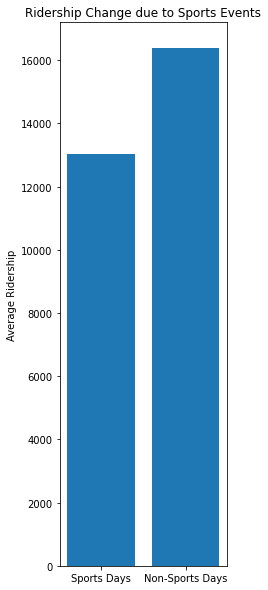

In [6]:
plt.rcParams["figure.figsize"] = [3, 10]
plt.bar(dfs1.index, dfs1['number_of_trips'])
xlabel = ['Sports Days', 'Non-Sports Days']
x_pos = [i for i, _ in enumerate(xlabel)]
plt.xticks(x_pos,xlabel)
plt.ylabel("Average Ridership")
plt.title("Ridership Change due to Sports Events")

In [14]:
X=df1
X.head()

,TOT_POP,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,COMMperc,INSTperc,sports_day,rainy_day,weekdays,MD_AGE_POP_PCT
0,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0.051668,0.06827,0,0,1,0.539
1,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0.051668,0.06827,0,0,2,0.539
2,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0.051668,0.06827,0,0,3,0.539
3,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0.051668,0.06827,0,0,4,0.539
4,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0.051668,0.06827,0,0,5,0.539


In [15]:
ridership = df.number_of_trips
tip = df.avg_tip
share_ride = df.avg_trip_pooled
#X=df1[['MEDINC','MED_AGE','crime_rate','AVg_Temp','Avg_WS']].transform(lambda x: x/x.mean())
#X[['UNEMP_RATE','col_pop_rate','sports_day','rainy_day']]=df1[['UNEMP_RATE','col_pop_rate','sports_day','rainy_day']]
#X=df1[['MEDINC','MED_AGE','UNEMP_RATE','col_pop_rate','crime_rate','Tol_precip','AVg_Temp','Avg_WS']]\
#.transform(lambda x: x/x.mean())
#X[['sports_day']]=df1[['sports_day']]
#X.head()

In [16]:
train_X1, val_X1, train_y1, val_y1=train_test_split(X,ridership, train_size=0.8)

In [17]:
clf = RandomForestRegressor()
clf.fit(train_X1, train_y1)
y_preds1 = clf.predict(val_X1)
acc_rf = round(clf.score(val_X1, val_y1), 4)
print ('Ridership Prediction R Squared is '+str(acc_rf))

Ridership Prediction R Squared is 0.9757


In [18]:
importances=clf.feature_importances_

Feature ranking:
1. feature 14 (0.772393)
2. feature 2 (0.108752)
3. feature 13 (0.043603)
4. feature 5 (0.020633)
5. feature 0 (0.016416)
6. feature 6 (0.011535)
7. feature 8 (0.007851)
8. feature 10 (0.006633)
9. feature 1 (0.004183)
10. feature 7 (0.002924)
11. feature 4 (0.002846)
12. feature 9 (0.001055)
13. feature 12 (0.000500)
14. feature 3 (0.000375)
15. feature 11 (0.000299)


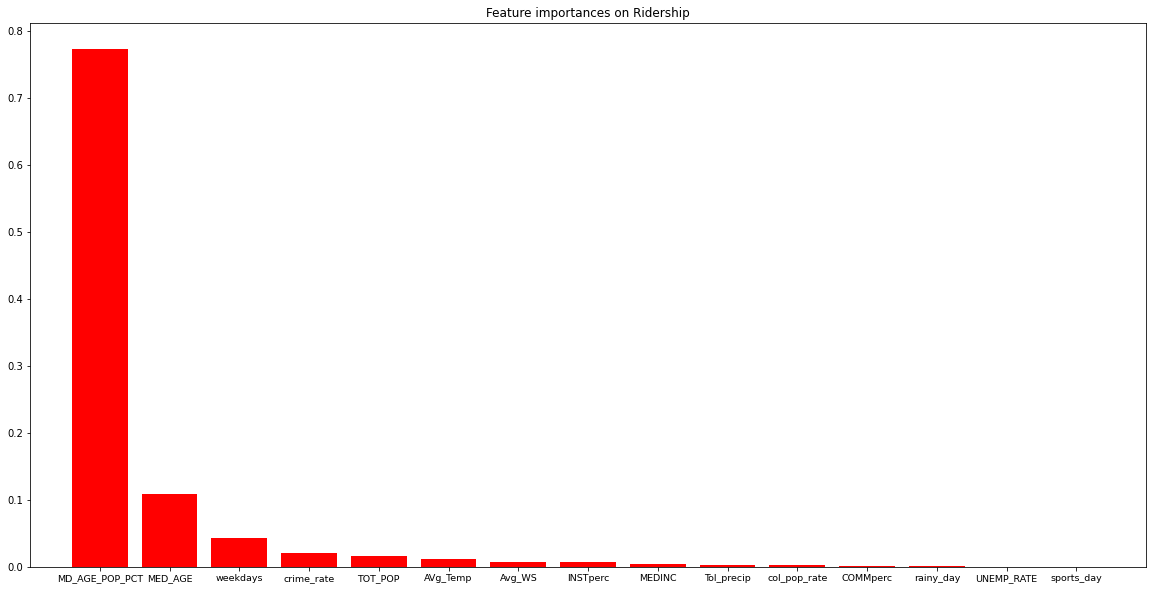

In [19]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams["figure.figsize"] = [20, 10]
plt.figure()
plt.title("Feature importances on Ridership")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]),X.columns[indices],fontsize=9.5)
plt.xlim([-1, X.shape[1]])
plt.show()

Text(0.5, 1.0, 'Predicted Ridership vs Real Ridership(test data)')

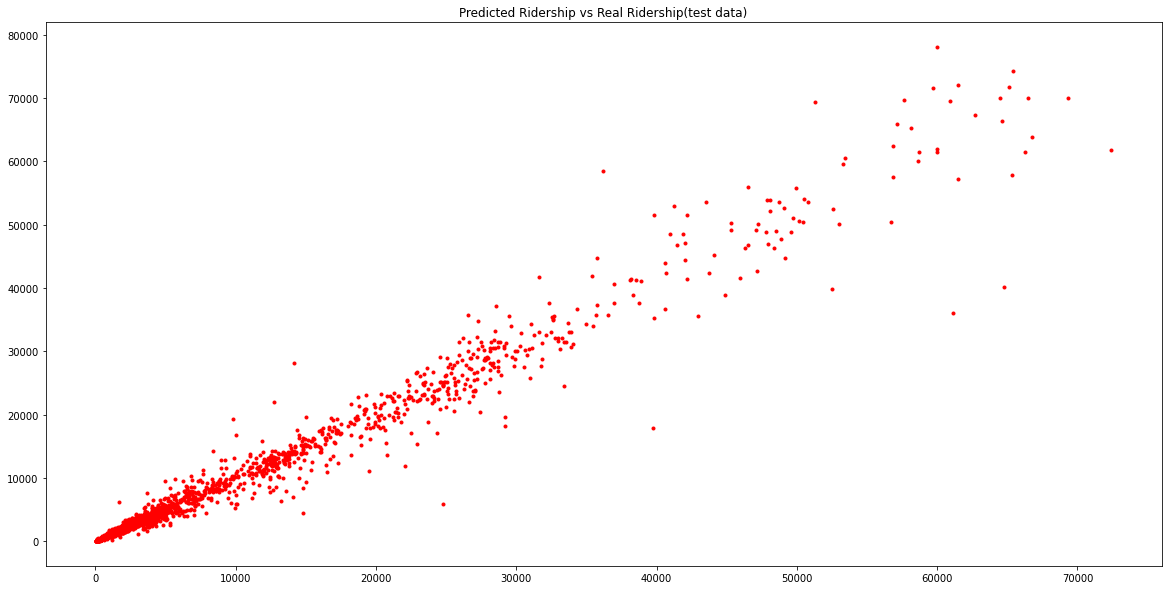

In [20]:
plt.plot(y_preds1,val_y1,'r.')
plt.title("Predicted Ridership vs Real Ridership(test data)")


In [21]:
import statsmodels.api as sm
model = sm.OLS(val_y1,y_preds1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        number_of_trips   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.230e+05
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:57:35   Log-Likelihood:                         -56075.
No. Observations:                6561   AIC:                                  1.122e+05
Df Residuals:                    6560   BIC:                                  1.122e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
X1=df1.drop(['TOT_POP','COMMperc','INSTperc','MD_AGE_POP_PCT'], axis = 1)
X1.head()

,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,sports_day,rainy_day,weekdays
0,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0,0,1
1,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0,0,2
2,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0,0,3
3,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0,0,4
4,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0,0,5


In [23]:
train_X2, val_X2, train_y2, val_y2=train_test_split(X1,tip,train_size=0.8)

In [24]:
clf = RandomForestRegressor()
clf.fit(train_X2, train_y2)
y_preds2 = clf.predict(val_X2)
acc_rf = round(clf.score(val_X2, val_y2), 4)
print ('Tip Prediction R Squared is '+str(acc_rf))

Tip Prediction R Squared is 0.9207


In [25]:
importances=clf.feature_importances_

Feature ranking:
1. feature 2 (0.350176)
2. feature 4 (0.202947)
3. feature 0 (0.157489)
4. feature 3 (0.132564)
5. feature 1 (0.083908)
6. feature 5 (0.030497)
7. feature 7 (0.018982)
8. feature 10 (0.013295)
9. feature 6 (0.007280)
10. feature 8 (0.002031)
11. feature 9 (0.000832)


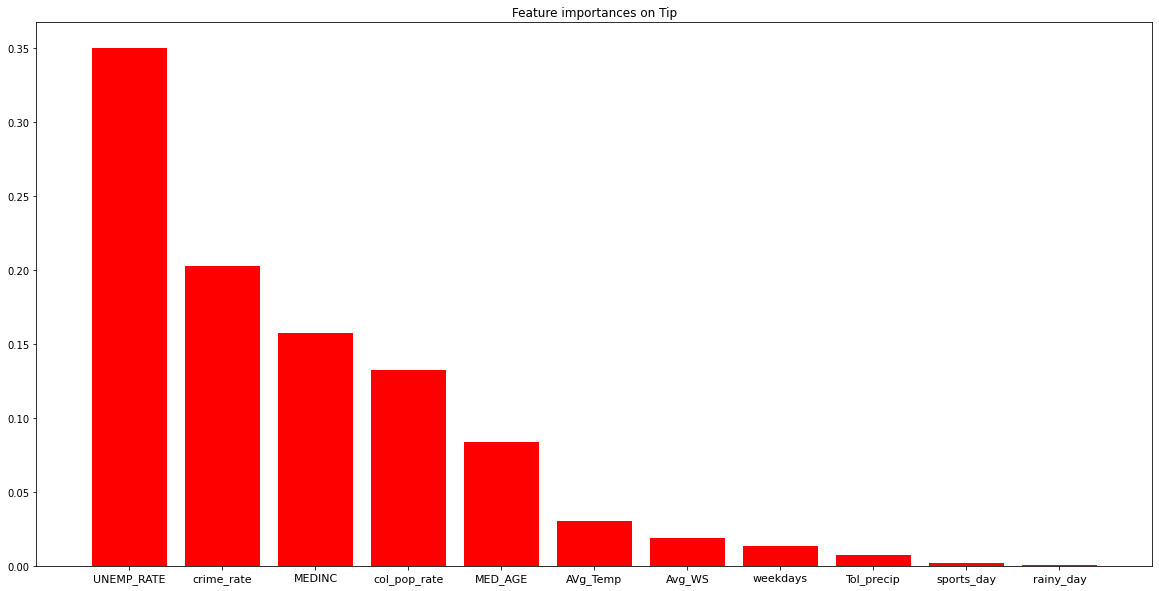

In [26]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams["figure.figsize"] = [20, 10]
plt.figure()
plt.title("Feature importances on Tip")
plt.bar(range(X1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]),X1.columns[indices],fontsize=11)
plt.xlim([-1, X1.shape[1]])
plt.show()

Text(0.5, 1.0, 'Predicted Tip vs Real Tip(test data)')

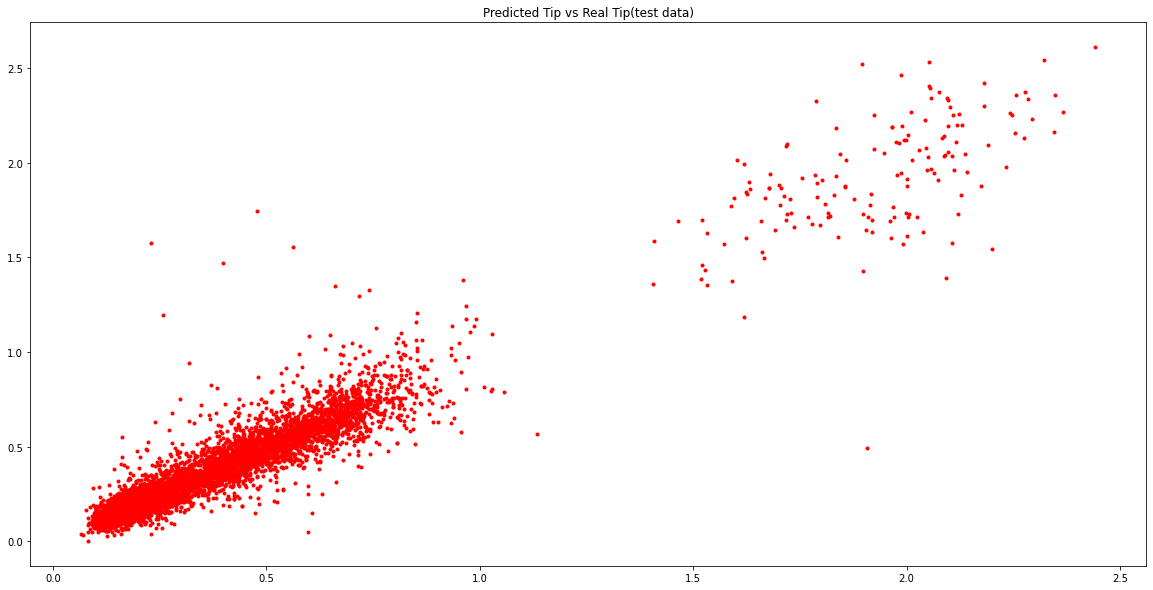

In [27]:
plt.plot(y_preds2,val_y2,'r.')
plt.title("Predicted Tip vs Real Tip(test data)")

In [28]:
model = sm.OLS(val_y2,y_preds2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                avg_tip   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          2.033e+05
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:57:47   Log-Likelihood:                          6532.0
No. Observations:                6561   AIC:                                 -1.306e+04
Df Residuals:                    6560   BIC:                                 -1.306e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
X2=X1
X2.head()

,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,sports_day,rainy_day,weekdays
0,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0,0,1
1,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0,0,2
2,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0,0,3
3,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0,0,4
4,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0,0,5


In [30]:
train_X3, val_X3, train_y3, val_y3=train_test_split(X2,share_ride,train_size=0.8)

In [31]:
clf = RandomForestRegressor()
clf.fit(train_X3, train_y3)
y_preds2 = clf.predict(val_X3)
acc_rf = round(clf.score(val_X3, val_y3), 4)
print ('Pooled Trip Prediction R Squared is '+str(acc_rf))

Pooled Trip Prediction R Squared is 0.8829


In [32]:
importances=clf.feature_importances_

Feature ranking:
1. feature 0 (0.293084)
2. feature 5 (0.264430)
3. feature 7 (0.142628)
4. feature 2 (0.083760)
5. feature 10 (0.060180)
6. feature 6 (0.050092)
7. feature 1 (0.041732)
8. feature 4 (0.038779)
9. feature 3 (0.021757)
10. feature 9 (0.003308)
11. feature 8 (0.000252)


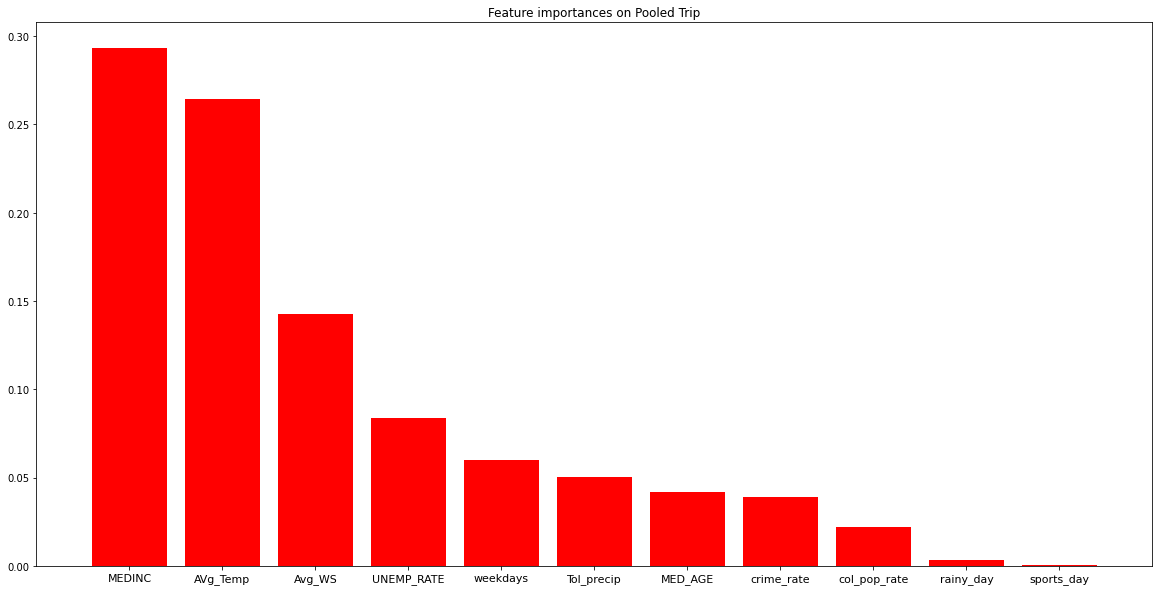

In [33]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams["figure.figsize"] = [20, 10]
plt.figure()
plt.title("Feature importances on Pooled Trip")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]),X2.columns[indices],fontsize=11)
plt.xlim([-1, X2.shape[1]])
plt.show()

In [34]:
from fbprophet import Prophet

In [3]:
dff=pd.DataFrame(df['number_of_trips'].groupby(by = df['Date']).sum())

In [6]:
dff.to_csv('RidershipTS.csv')

In [67]:
dff['date']=dff.index

In [68]:
from datetime import datetime

In [69]:
for i in range(len(dff)):
    dff.date[i]=datetime.strptime(dff.date[i],'%m/%d/%Y').date()

In [70]:
dff= dff[[c for c in dff if c not in ['number_of_trips']] 
       + ['number_of_trips']]

In [71]:
dff=dff.sort_values(by='date') 

In [73]:
dff['date']=pd.to_datetime(dff['date'])

In [74]:
dff_train=dff[0:(len(dff)-61)]
dff_train= dff_train.rename(columns={'date': 'ds', 'number_of_trips': 'y'})
dff_train

,ds,y
Date,,
11/1/2018,2018-11-01,270421
11/2/2018,2018-11-02,320123
11/3/2018,2018-11-03,356549
11/4/2018,2018-11-04,286098
11/5/2018,2018-11-05,228342
...,...,...
10/27/2019,2019-10-27,299666
10/28/2019,2019-10-28,232598
10/29/2019,2019-10-29,250788


In [75]:
dff_test=dff[(len(dff)-61):]
dff_test= dff_test.rename(columns={'Date': 'ds', 'number_of_trips': 'y'})
dff_test

,date,y
Date,,
11/1/2019,2019-11-01,363207
11/2/2019,2019-11-02,369960
11/3/2019,2019-11-03,282952
11/4/2019,2019-11-04,228901
11/5/2019,2019-11-05,242246
...,...,...
12/27/2019,2019-12-27,242539
12/28/2019,2019-12-28,272789
12/29/2019,2019-12-29,230924


In [76]:
m = Prophet()
m.fit(dff_train)
future = m.make_future_dataframe(periods=61)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
421,2019-12-27
422,2019-12-28
423,2019-12-29
424,2019-12-30
425,2019-12-31


In [77]:
forecast = m.predict(future)

In [78]:
fc=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][365:]
fc

,ds,yhat,yhat_lower,yhat_upper
365,2019-11-01,334016.418566,298388.675865,369519.322075
366,2019-11-02,356821.638293,321131.396593,392240.635016
367,2019-11-03,274901.623716,239146.075409,308953.698044
368,2019-11-04,231614.033311,196104.200484,263676.869778
369,2019-11-05,244540.614529,213116.326756,280102.072940
...,...,...,...,...
421,2019-12-27,333896.166550,299730.394307,366243.250129
422,2019-12-28,356701.386277,321525.850747,389651.002135
423,2019-12-29,274781.371700,241768.956119,309449.072133
424,2019-12-30,231493.781295,195255.450055,269289.007309


In [79]:
plt.rcParams.update({'font.size': 15})

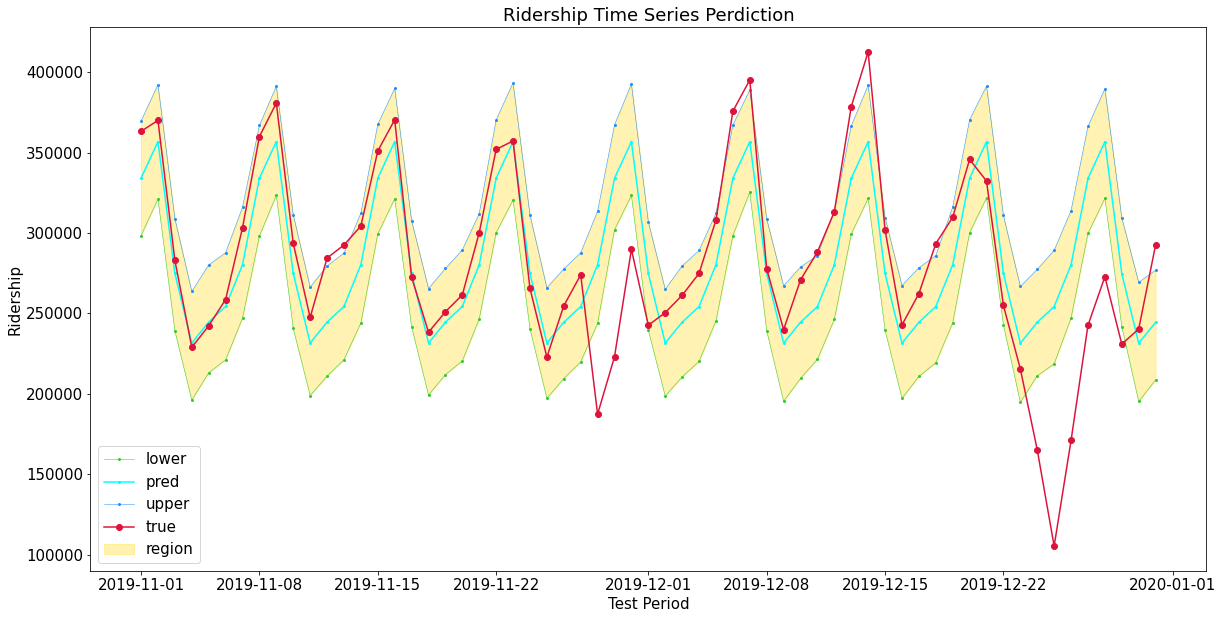

In [80]:
test = dff_test.y
pred = fc.yhat
lower = fc.yhat_lower
upper = fc.yhat_upper
xs = fc.ds

f, ax = plt.subplots(figsize=(20,10))

ax.plot(xs, lower, color='limegreen', marker='o', label='lower', lw=0.5, markersize=2)
ax.plot(xs, pred, color='aqua', marker='o', label='pred', markersize=2)
ax.plot(xs, upper, color='dodgerblue', marker='o', label='upper', lw=0.5, markersize=2)
ax.plot(xs, test, color='crimson', marker='o', label='true')
ax.fill_between(xs, lower, upper, color='gold', alpha=0.3, label='region')
plt.legend()


plt.title('Ridership Time Series Perdiction')
plt.xlabel('Test Period')
plt.ylabel('Ridership')
plt.show()

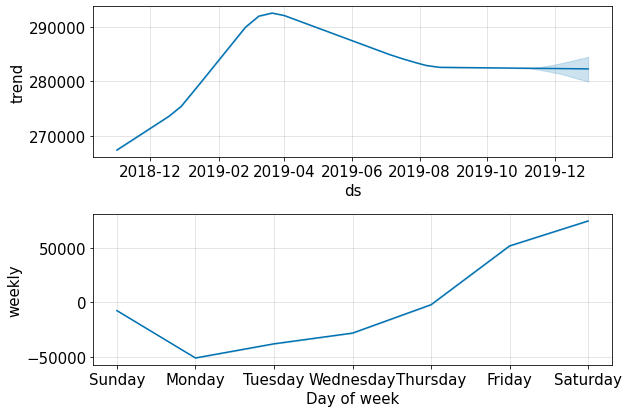

In [81]:
figure2=m.plot_components(forecast)